## TP3: Jeu de données Complets

In [ ]:
# A ùettre

#conda install -c conda-forge keras
#conda install -c anaconda nltk

In [88]:
import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import pandas as pd

import nltk    #Natural language processing tool-kit
nltk.download('stopwords')
  
from nltk.corpus import stopwords                   #Stopwords corpus

from keras.datasets import imdb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### explication du jeu de données:

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

In [5]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [6]:
np.unique(y_test)


array([0, 1], dtype=int64)

### d'aprés le label on peut dire que c'est un probléme de classification avec '0' représentant les mauvais sentiments dans les commentaires et '1' étant les bons sentiments.

In [7]:
X_train.shape

(25000,)

In [8]:
y_train.shape

(25000,)

### la taille des features  est de 25000 et de même pour les labels aussi qui égal à 25000

### Les textes ont été hashés

In [50]:
X_train[0:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

### On essaie de reconstruire le 6-ième texte

In [18]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    print(listOfKeys)

### on voit que chaque nombre entier représente  un mot spécifique dans un dictionnaire voici a quoi ressemble le premier commentaire

In [100]:
print(X_train[0])

[1, None, None, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, None, 173, None, 256, 5, 25, 100, 43, None, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, None, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, None, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


### Les critiques des films peuvent être aussi de longueur differentes. Par exemple les premiers et deuxième commentaire on a 218 mots contre 189.

In [53]:
len(X_train[0]),len(X_train[1])

(218, 189)

### Le code suivant permet d'afficher les entiers en texte. Par exemple on affiche tous les mots qui composent le 6éme commentaire.

In [42]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    print(listOfKeys)

In [44]:
for word_num in X_train[5]:
    getKeysByValue(imdb.get_word_index(),word_num)
    w.append(getKeysByValue(imdb.get_word_index(),word_num))

['the']
['the']
['and']
['and']
['still']
['still']
['been']
['been']
['that']
['that']
['and']
['and']
['makes']
['makes']
['for']
['for']
['of']
['of']
['and']
['and']
['and']
['and']
['and']
['and']
['and']
['and']
['an']
['an']
['because']
['because']
['before']
['before']
['if']
['if']
['just']
['just']
['though']
['though']
['something']
['something']
['know']
['know']
['and']
['and']
['and']
['and']
['i']
['i']
['i']
['i']
['and']
['and']
['lot']
['lot']
['of']
['of']
['and']
['and']
['and']
['and']
['with']
['with']
['and']
['and']
['in']
['in']
['of']
['of']
['script']
['script']
['their']
['their']
['that']
['that']
['out']
['out']
['end']
['end']
['his']
['his']
['and']
['and']
['i']
['i']
['i']
['i']


In [46]:
x=pd.DataFrame(X_train,columns=['sentence'])
y=pd.DataFrame(y_train,columns=['label'])


In [41]:
y=pd.DataFrame(y_train,columns=['label'])

### nombre de mot unique dans le training set

In [67]:
print("nombre de mots unique dans X_train: ")
print(len(np.unique(np.hstack(X_train))))

nombre de mots unique dans X_train: 
88585


### On a 88585 mots unique dans le training set ce qui est énorme.

### visualisation des 10 premiers critiques et les 10 premiers sentiments

In [135]:
y_sub=y['label'][0:10]
x_sub=x['sentence'][0:10]
print(x_sub)
print(y_sub)


0    [1, None, None, 16, 43, 2, 2, 2, 2, 65, 458, 2...
1    [1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 13...
2    [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 2...
3    [1, 4, 2, 2, 33, 2, 4, 2, 432, 111, 153, 103, ...
4    [1, 249, 2, 7, 61, 113, 10, 10, 13, 2, 14, 20,...
5    [1, 2, 128, 74, 12, 2, 163, 15, 4, 2, 2, 2, 2,...
6    [1, 2, 365, 2, 5, 2, 354, 11, 14, 2, 2, 7, 2, ...
7    [1, 4, 2, 2, 4, 65, 7, 4, 2, 2, 2, 2, 2, 2, 2,...
8    [1, 43, 188, 46, 5, 2, 264, 51, 6, 2, 2, 14, 9...
9    [1, 14, 20, 47, 111, 439, 2, 19, 12, 15, 166, ...
Name: sentence, dtype: object
0    1
1    0
2    0
3    1
4    0
Name: label, dtype: int64


### On essaie de reconstruire le 6-ième texte

### on va essayer d'ecrire une fonction qui permet de convertir les entiers qui sont dans x_sub en mot et aprés on va pouvoir utiliser 'bag of words ' avec l'utisation de la méthode Countvectorizer().

Exemples d'affichages:

In [60]:
print(x_sub[0][0])
getKeysByValue(imdb.get_word_index(),x_sub[0][0])

1
['the']


In [61]:
print(x_sub[1][1])
getKeysByValue(imdb.get_word_index(),x_sub[1][1])

194
['thought']


In [62]:
print(x_sub[4][2])
getKeysByValue(imdb.get_word_index(),x_sub[4][2])

2
['and']


In [111]:

word=[]

In [112]:
word_index = imdb.get_word_index()
index_word = {v:k for k,v in word_index.items()}

In [113]:
v=[1,2,3,4,5]
for i in v:
    word.append(' '.join(index_word.get(w) for w in X_train[i]))
word

["the thought and thought and do making to is and and and while he of and in where and as getting on was did and fact characters to always life and not as me can't in at are br of sure your way of little it and and to and of love it so and of guy it used and of where it of here and film of and to don't all and some like of direction it if out her and and keep of and he and to makes this and and of and it thought and br and and budget and though and and and for ever better were and and for budget look and any to of making it out and and for effects show to show cast this family us scenes more it and making and to and and tv and to of and these thing wants but and an and and as it is video do you and see and it in few those are of and for with of and to one is very work dark they don't do dvd with those them",
 "the as there in at by br of sure many br of and no only women was than doesn't as you never of and night that with and they bad out and plays of how star so and film comes and an

In [121]:

X=pd.DataFrame(word,columns=['sentence'])
X

,sentence
0,the thought and thought and do making to is an...
1,the as there in at by br of sure many br of an...
2,the of and and they and of and went plot actor...
3,the sure and br only acting i i was and as on ...
4,the and still been that and makes for of and a...


### On crée un dictionnaire, puis on compte le nombre d'apparition des mots du dictionnaire dans chaque texte (critique)

In [122]:
X_sub = X['sentence'][0:4]
X_sub

0    the thought and thought and do making to is an...
1    the as there in at by br of sure many br of an...
2    the of and and they and of and went plot actor...
3    the sure and br only acting i i was and as on ...
Name: sentence, dtype: object

In [123]:
count_vect = CountVectorizer()
X_sub_counts = count_vect.fit_transform(X_sub)
dictionary_sub   = count_vect.get_feature_names()
print(dictionary_sub)

['about', 'acting', 'actors', 'all', 'almost', 'already', 'also', 'always', 'an', 'and', 'any', 'are', 'as', 'at', 'away', 'bad', 'be', 'because', 'been', 'better', 'big', 'bit', 'br', 'budget', 'but', 'by', 'can', 'care', 'cast', 'certainly', 'character', 'characters', 'children', 'comes', 'could', 'dark', 'did', 'different', 'direction', 'do', 'does', 'doesn', 'don', 'dvd', 'early', 'effects', 'end', 'enjoy', 'enough', 'even', 'ever', 'every', 'excellent', 'fact', 'family', 'fan', 'far', 'few', 'film', 'films', 'final', 'find', 'first', 'for', 'from', 'getting', 'good', 'guy', 'had', 'hard', 'has', 'have', 'having', 'he', 'her', 'here', 'high', 'him', 'history', 'hollywood', 'home', 'house', 'how', 'human', 'if', 'in', 'into', 'is', 'isn', 'it', 'its', 'job', 'just', 'keep', 'killer', 'know', 'last', 'lead', 'least', 'left', 'less', 'life', 'like', 'lines', 'little', 'look', 'lost', 'lot', 'love', 'made', 'make', 'makes', 'making', 'man', 'many', 'me', 'more', 'most', 'movie', 'my', 

### On regarde les dimensions de X_sub

In [124]:
print(X_sub_counts.shape) 
print(X_sub_counts[0])
print(type(X_sub_counts))

(4, 209)
  (0, 164)	1
  (0, 43)	1
  (0, 167)	1
  (0, 35)	1
  (0, 202)	1
  (0, 184)	1
  (0, 127)	1
  (0, 200)	2
  (0, 171)	2
  (0, 57)	1
  (0, 145)	1
  (0, 206)	1
  (0, 185)	1
  (0, 8)	1
  (0, 24)	1
  (0, 187)	1
  (0, 168)	1
  (0, 166)	1
  (0, 178)	1
  (0, 116)	1
  (0, 142)	1
  (0, 181)	1
  (0, 54)	1
  (0, 28)	1
  (0, 149)	2
  :	:
  (0, 13)	1
  (0, 26)	1
  (0, 115)	1
  (0, 124)	1
  (0, 101)	1
  (0, 7)	1
  (0, 31)	1
  (0, 53)	1
  (0, 36)	1
  (0, 188)	1
  (0, 126)	1
  (0, 65)	1
  (0, 12)	3
  (0, 197)	2
  (0, 85)	3
  (0, 125)	15
  (0, 73)	2
  (0, 199)	1
  (0, 87)	3
  (0, 174)	10
  (0, 112)	3
  (0, 39)	3
  (0, 9)	49
  (0, 173)	3
  (0, 162)	1
<class 'scipy.sparse.csr.csr_matrix'>


In [125]:
print(X_sub_counts.toarray()[0,:])

[ 0  0  0  1  0  0  0  1  1 49  1  2  3  1  0  0  0  0  0  1  0  0  2  2
  1  0  1  0  1  0  0  1  0  0  0  1  1  0  1  3  0  0  2  1  0  1  0  0
  0  0  1  0  0  1  1  0  0  1  1  0  0  0  0  4  0  1  0  1  0  0  0  0
  0  2  1  1  0  0  0  0  0  0  0  0  1  3  0  3  0 10  0  0  0  1  0  0
  0  0  0  0  0  1  1  0  1  1  0  0  1  0  0  1  3  0  0  1  1  0  0  0
  0  0  0  0  1 15  1  1  0  0  0  2  0  0  0  0  0  0  0  0  0  0  1  0
  0  1  0  0  0  2  0  1  1  0  0  0  0  0  0  1  0  0  1  0  1  0  1  1
  1  0  2  2  1  3 10  0  0  0  1  0  0  1  1  0  1  1  0  1  1  0  0  1
  0  0  1  0  0  2  0  1  2  0  1  0  0  0  1  0  1]


In [126]:
word_counts = pd.DataFrame(X_sub_counts.toarray(),columns = dictionary_sub)
word_total_counts = pd.DataFrame()
word_total_counts['count'] = word_counts.sum(axis=0)
word_total_counts['word'] = dictionary_sub

In [127]:
word_total_counts_sorted_top  = word_total_counts.sort_values(by="count",ascending = False).iloc[0:20]

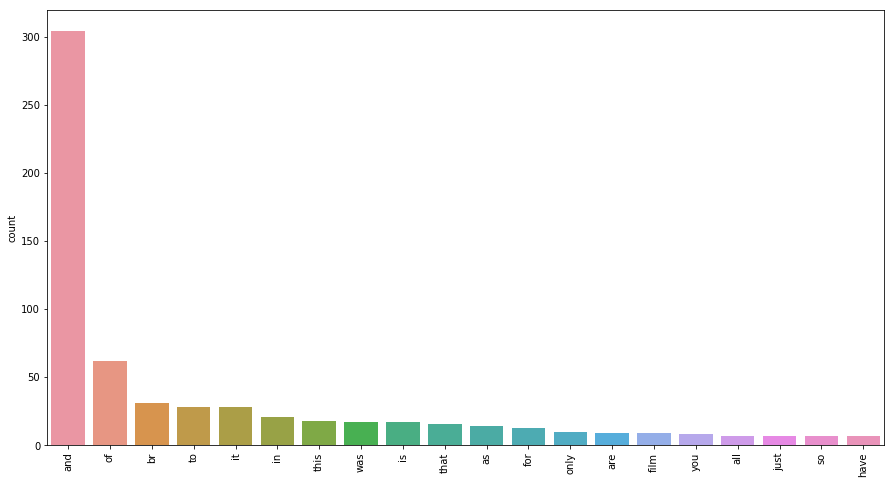

In [128]:
plt.figure(figsize=(15,8))
sns.barplot(x = word_total_counts_sorted_top.index,y=word_total_counts_sorted_top['count'])
plt.xticks(rotation=90,fontsize=10)
plt.show()

### le diagramme en barre ci-dessus nous donnes les mots les plus présents dans les 5 textes critiques

### on va essayer de definir une fonction qui prend en encapsule ce qui précede 

In [129]:
def most_frequent_words(count_vect,data):    
    data_counts = count_vect.fit_transform(data)
    dictionary   = count_vect.get_feature_names()
    print("Taille du dictionnaire : ",len(dictionary))
    word_counts = pd.DataFrame(data_counts.toarray(),columns = dictionary)
    word_total_counts = pd.DataFrame()
    word_total_counts['count'] = word_counts.sum(axis=0)
    word_total_counts['word'] = dictionary
    word_total_counts_sorted_top  = word_total_counts.sort_values(by="count",ascending = False).iloc[0:20]
    plt.figure(figsize=(15,8))
    sns.barplot(x = word_total_counts_sorted_top.index,y=word_total_counts_sorted_top['count'])
    plt.xticks(rotation=90,fontsize=10)
    plt.show()
    return {'data_counts' : data_counts, 'word_total_counts' :word_total_counts, 'dictionary' : dictionary}

In [130]:
count_vect = CountVectorizer()
X_sub_counts = count_vect.fit_transform(X_sub)

Taille du dictionnaire :  209


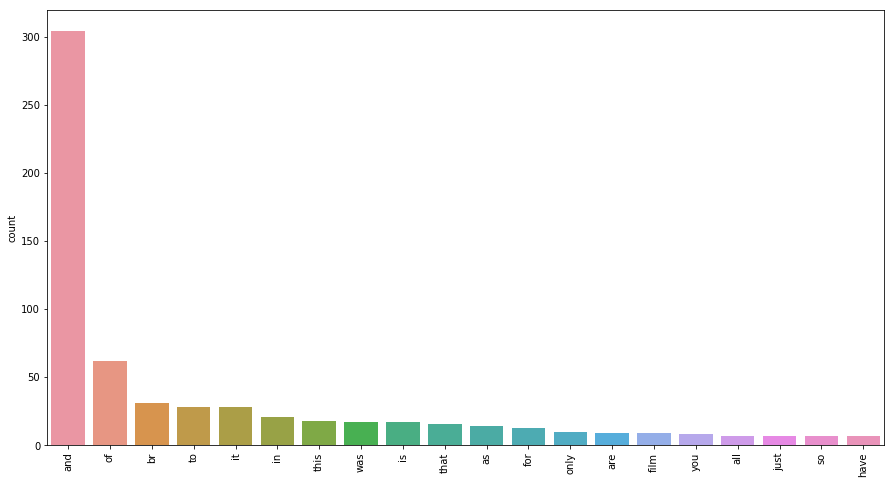

In [131]:
most_frequent_words_sub = most_frequent_words(count_vect,X_sub)

### la fonction most_frequent_words nous donne le mot le plus féquents dans les 5 premiers commentaires on voit que c'est le mot "and".

In [143]:
y1=pd.DataFrame(y_train,columns=['label'])[0:5]
y1

,label
0,1
1,0
2,0
3,1
4,0


### utilisation de stopwords sur nos données

In [136]:
stop = set(stopwords.words('english')) 
print(stop)

{'you', 'were', 'down', 'yours', 'be', 'been', "hadn't", 'the', 'couldn', 'hadn', 'did', "wasn't", 'needn', 'out', 'once', 'from', "isn't", 'wasn', 'wouldn', 'll', 'does', 'but', 'until', 'themselves', 'what', 'no', "you're", 'by', 'here', 'where', 'over', 'after', "you'll", "weren't", 'will', "mightn't", 'while', 're', 'at', 'against', "shan't", "needn't", 'is', 'your', 'off', 'during', 'should', 'and', 'as', 'aren', 'how', 'don', 'mightn', "it's", 'an', 'doing', 'own', 'i', 'than', 'when', 'doesn', "mustn't", 'only', 'whom', "haven't", "should've", 'yourselves', 'itself', 'd', 'himself', "that'll", 'up', 'has', 'they', "didn't", "doesn't", "hasn't", 'them', 'being', 'him', 'some', 'above', 'few', 'y', 'in', 'myself', "aren't", 'she', 'have', 'of', 'he', 'all', 'herself', 'or', 'any', 'again', 'below', 'through', 'who', 'had', 'can', 't', 'our', 'are', 'hers', 'that', 'not', 'weren', 'before', 'with', 'most', 'other', 'his', 'ours', 'mustn', 'its', 'into', 'under', 'why', 'shouldn', "

Taille du dictionnaire :  127


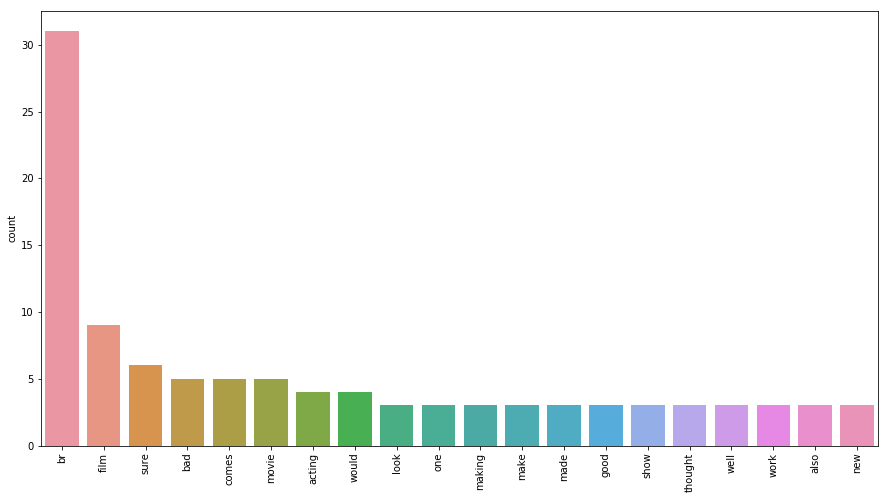

In [138]:
count_vect_sw = CountVectorizer(stop_words=stop)
most_frequent_words_sw = most_frequent_words(count_vect_sw,X_sub)

### on va essayer de faire 99 premiers commentaires pour voir ce que sa donne.

In [147]:
word_tot=[]
v=range(1,100)
for i in v:
    word_tot.append(' '.join(index_word.get(w) for w in X_train[i]))
word_tot

["the thought and thought and do making to is and and and while he of and in where and as getting on was did and fact characters to always life and not as me can't in at are br of sure your way of little it and and to and of love it so and of guy it used and of where it of here and film of and to don't all and some like of direction it if out her and and keep of and he and to makes this and and of and it thought and br and and budget and though and and and for ever better were and and for budget look and any to of making it out and and for effects show to show cast this family us scenes more it and making and to and and tv and to of and these thing wants but and an and and as it is video do you and see and it in few those are of and for with of and to one is very work dark they don't do dvd with those them",
 "the as there in at by br of sure many br of and no only women was than doesn't as you never of and night that with and they bad out and plays of how star so and film comes and an

In [167]:
X1=pd.DataFrame(word_tot,columns=['sentence'])
X1=X1['sentence'][0:99]
X1

0     the thought and thought and do making to is an...
1     the as there in at by br of sure many br of an...
2     the of and and they and of and went plot actor...
3     the sure and br only acting i i was and as on ...
4     the and still been that and makes for of and a...
5     the and full and to and boring this as and and...
6     the of and and of their br of and and and and ...
7     the out can't some to and looking when is and ...
8     the as on there plot she's and film that for f...
9     the and fact entertaining there life back br i...
10    the no was and as on was me time along and not...
11    the was did and fact and was then laugh what o...
12    the especially like after same and and this as...
13    the and on they where totally instead he aroun...
14    the is and hope br my out and this is again an...
15    the and and this of and it of and of and it mo...
16    the they of and br of and thought and and and ...
17    the was one see me of and br wife as on tr

In [181]:
y1=pd.DataFrame(y_train,columns=['label'])[0:99]
y1=y1['label'][0:99]
y1

0     1
1     0
2     0
3     1
4     0
5     0
6     1
7     0
8     1
9     0
10    1
11    0
12    0
13    0
14    0
15    0
16    1
17    1
18    0
19    1
20    0
21    0
22    1
23    0
24    1
25    1
26    0
27    0
28    1
29    0
     ..
69    1
70    1
71    0
72    0
73    1
74    1
75    0
76    1
77    0
78    0
79    1
80    1
81    0
82    0
83    1
84    1
85    0
86    0
87    0
88    1
89    0
90    0
91    0
92    0
93    0
94    0
95    0
96    0
97    1
98    1
Name: label, Length: 99, dtype: int64

### Apprentissage Supervisé:

Taille du dictionnaire :  367


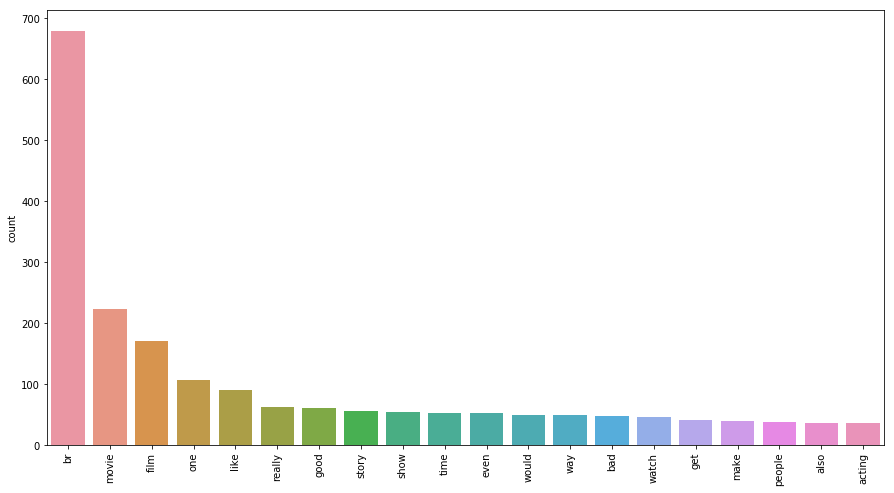

In [168]:
count_vect_sw = CountVectorizer(stop_words=stop)
most_frequent_words_sw = most_frequent_words(count_vect_sw,X1)

### On va utiliser ici Tfidf

In [169]:
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [170]:
tf_idf_transf = transformer.fit_transform(most_frequent_words_sw['data_counts'])
tf_idf_transf

<99x367 sparse matrix of type '<class 'numpy.float64'>'
	with 4082 stored elements in Compressed Sparse Row format>

In [172]:
NB_tfidf = GaussianNB()
NB_tfidf.fit(X=tf_idf_transf.toarray(),y=y1)
accuracy_score(NB_tfidf.predict(tf_idf_transf.toarray()),y1)

0.9292929292929293

### on a une precision de 92% sur les 99 premiers critiques sur tf_idf ce qui est bien.

In [179]:
X1['prediction_tfidf'] = NB_tfidf.predict(tf_idf_transf.toarray())
X1['prediction_tfidf']

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [184]:
X1['prediction_tfidf'] != y1

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
87    False
88    False
89    False
90    False
91     True
92    False
93    False
94     True
95     True
96    False
97    False
98    False
Name: label, Length: 99, dtype: bool

In [188]:
NB_logistic = SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42,\
                           max_iter=5, tol=None)
logistic_fit = NB_logistic.fit(X=tf_idf_transf.toarray(),y=y1)
accuracy_score(NB_logistic.predict(tf_idf_transf.toarray()),y1)

0.8585858585858586

### Par contre avec Naive Bayes Logistic on a une precision de 85% sur les 99 premiers commentaires ce qui est un peu moins comparé à Gaussien Naive Bayes

In [189]:
print("Mots avec le coeff le plus négatif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][0]])
print("Mots avec le coeff le plus positif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][-1]])

Mots avec le coeff le plus négatif :  bad
Mots avec le coeff le plus positif :  must


### le code précédent nous donne le mot le plus négatif qui est "bad" et le plus positif "must" sur les 99 premiers commentaires. En faisant avec les 25000 jeux données on pourra l'amelioré peut étre mais c'est quand même une grande quantité de données.